In [20]:
import os
import json

def get_data(folder_name):
    x = []
    y = []
    positions = []
    file_names = []

    for file in os.listdir(folder_name):
        if file.endswith(".txt"):
            file_name = os.path.join(folder_name, file[:-4])

            file_text = open(file_name + '.txt', encoding='utf8')
            try:
                file_truth = open(file_name + '.truth', encoding='utf8')

                try:
                    text = file_text.read()
                    truth = json.load(file_truth)
                    truth_changes = len(truth['borders']) > 0
                    truth_positions = truth['borders']

                    x.append(text)
                    y.append(truth_changes)
                    positions.append(truth_positions)
                    file_names.append(file[:-4])
                finally:
                    file_truth.close()
            finally:
                file_text.close()

    return x, y, positions, file_names

In [21]:
BREACH_DIR = '../data/breach'

X, y, positions, file_names = get_data(BREACH_DIR)

In [22]:
import pandas as pd
df = pd.DataFrame(data={'text': X, 'label': y, 'filename': file_names, 'pos':positions})

In [23]:
from nltk.tokenize import sent_tokenize, word_tokenize
df['num_words'] = [len(word_tokenize(x)) for x in df.text]

In [25]:
df.num_words.describe()

count     187.000000
mean     1823.572193
std      1066.682718
min       161.000000
25%      1071.000000
50%      1715.000000
75%      2447.000000
max      5724.000000
Name: num_words, dtype: float64

In [26]:
df.label.tolist().count(True)/df.label.tolist().count(False)

4.194444444444445

In [27]:
df.label.tolist().count(False)/len(df.label.tolist())

0.1925133689839572

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

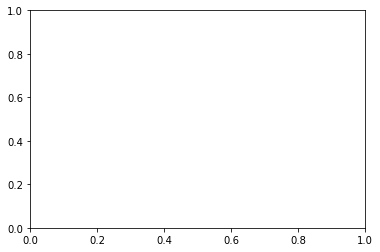

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
df.label.hist()

<AxesSubplot:>

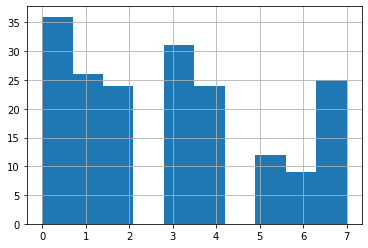

In [29]:
df['num_splits'] = [len(x) for x in df.pos]
df.num_splits.hist()

In [30]:
df.num_splits.describe()

count    187.000000
mean       2.951872
std        2.323983
min        0.000000
25%        1.000000
50%        3.000000
75%        4.000000
max        7.000000
Name: num_splits, dtype: float64

In [31]:
df['num_char'] = [len(x) for x in df.text]
df.num_char.describe()

count      187.000000
mean      9902.614973
std       5961.197490
min        832.000000
25%       5533.000000
50%       8880.000000
75%      13319.500000
max      31848.000000
Name: num_char, dtype: float64

In [32]:
from nltk.tokenize import sent_tokenize
def get_sentences(text, wordFilter=None):
    sentences = []
    paragraphs = [p for p in text.split('\n') if p]
    for paragraph in paragraphs:
        if wordFilter:
            sentences.extend([wordFilter(s) for s in sent_tokenize(paragraph)])
        else:
            sentences.extend(sent_tokenize(paragraph))

    return sentences

In [33]:
s = get_sentences(df.text[0])

In [34]:
for sent in s:
    print(sent)
    print('---------------')

Obama's motherreturned to Hawaii in 1972 for five years, and then in 1977 wentback to Indonesia, where she worked as an anthropological fieldworker.
---------------
She stayed there most of the rest of her life, returning toHawaii in 1994.
---------------
She died of ovarian cancer in 1995.
---------------
Of his early childhood, Obamahas recalled, "That my father looked nothing like the people aroundme that he was black as pitch, my mother white as milk barelyregistered in my mind."
---------------
In his 1995 memoir, he described hisstruggles as a young adult to reconcile social perceptions of hismultiracial heritage.
---------------
He wrote that he used alcohol, marijuana, andcocaine during his teenage years to "push questions of who I wasout of my mind."
---------------
During the elections for the Presidency, Obamaidentified his high-school drug use as his greatest moralfailure.
---------------
After returning to the UnitedStates, he attended Punahou School from the fifth grade u